In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-data/Test.csv
/kaggle/input/train/Train.csv


# **Hypothesis Generation Based On Various Factors**
in our problem there is various factors that affect sales of each item 
> **these are some factors:**
* item price: Lower-priced items may have higher sales than higher-priced items, due to greater affordability.
* item quality: Higher-quality items may have higher sales than lower-quality items, due to greater customer satisfaction.
* item availability: items that are frequently out of stock may have lower sales than items that are consistently in stock.
* Promotion and advertising: items that are mostly promoted or advertised correctly may have higher sales than items that are not.


In [2]:
data = pd.read_csv('/kaggle/input/train/Train.csv')

data.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [3]:
test = pd.read_csv('/kaggle/input/test-data/Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**check data set deminssion**

In [4]:
data.shape

(8523, 12)

**check data type of data**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **to see the minimum value, mean values, different percentile values, and maximum values.**

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **check how many missing values there in data set**

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data['Item_Weight']=data['Item_Weight'].fillna(value=data['Item_Weight'].mean())


In [9]:
data['Outlet_Size']=data['Outlet_Size'].fillna(value='Unknown')


In [10]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
data.Item_Identifier.value_counts()


FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

**checking outliers**

<Axes: >

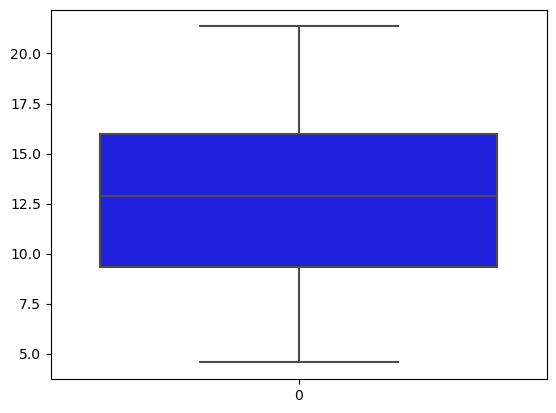

In [12]:
sns.boxplot(data['Item_Weight'],color='blue')

<Axes: >

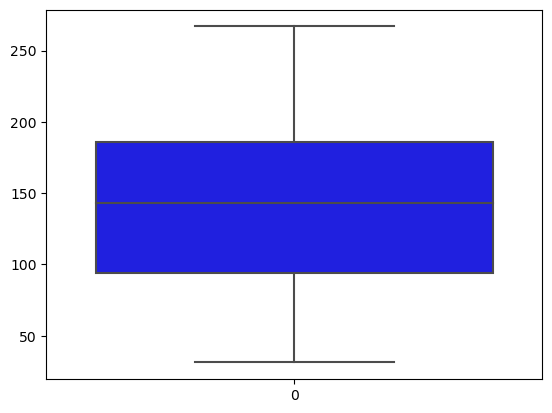

In [13]:
sns.boxplot(data['Item_MRP'],color='blue')

<Axes: >

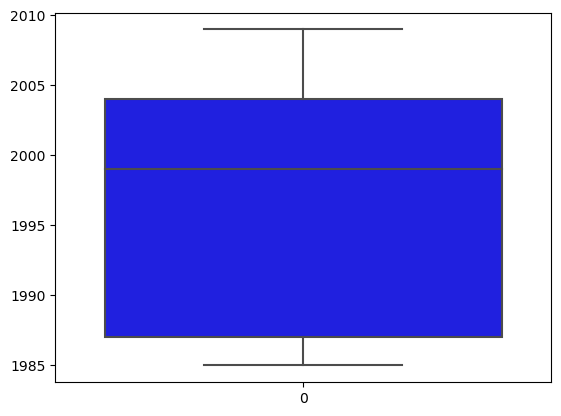

In [14]:
sns.boxplot(data['Outlet_Establishment_Year'],color='blue')

<Axes: >

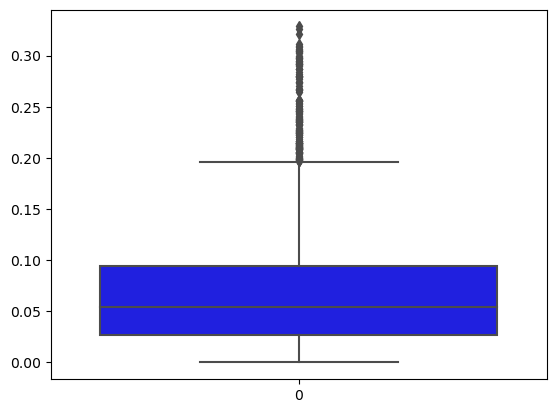

In [15]:
sns.boxplot(data['Item_Visibility'],color='blue')

<Axes: >

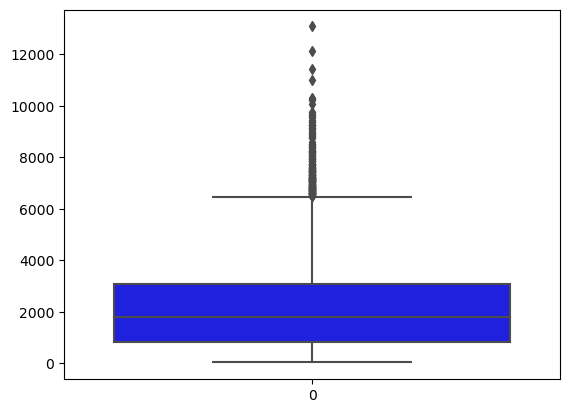

In [16]:
sns.boxplot(data['Item_Outlet_Sales'],color='blue')

# we will remove outliers 

In [17]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# univarte analysis

<Axes: >

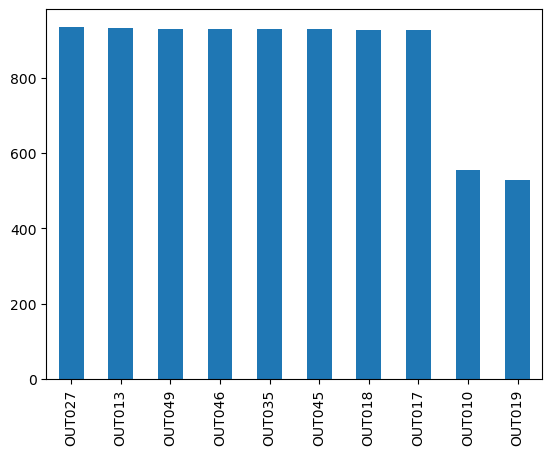

In [18]:
data['Outlet_Identifier'].value_counts().plot(kind='bar')

<Axes: >

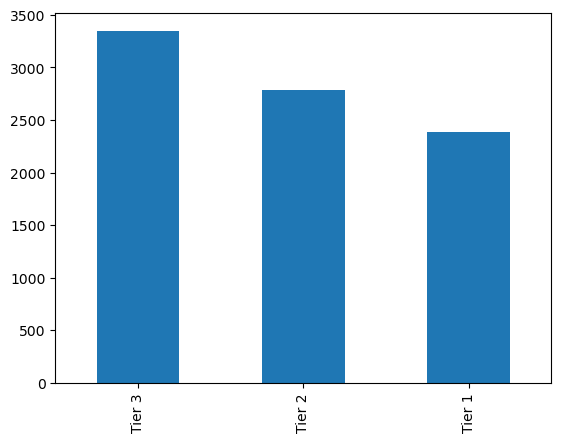

In [19]:
data['Outlet_Location_Type'].value_counts().plot(kind='bar')


<Axes: >

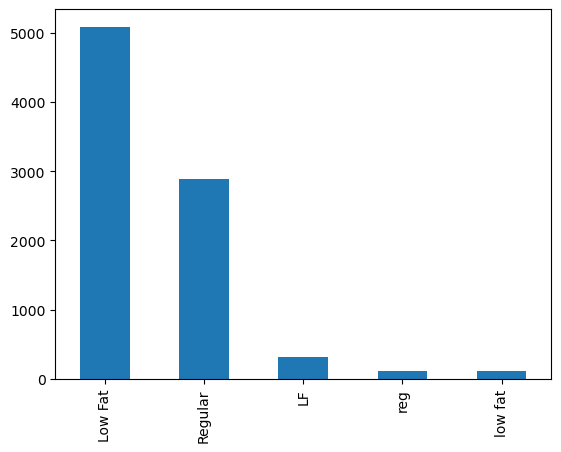

In [20]:
data['Item_Fat_Content'].value_counts().plot(kind='bar')


<Axes: >

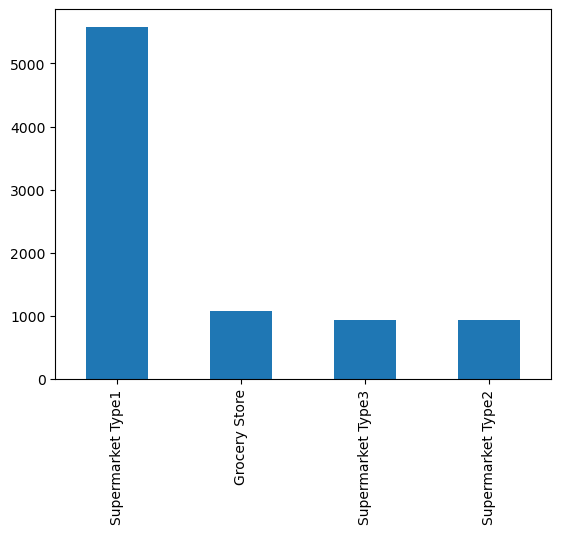

In [21]:
data['Outlet_Type'].value_counts().plot(kind='bar')


<Axes: >

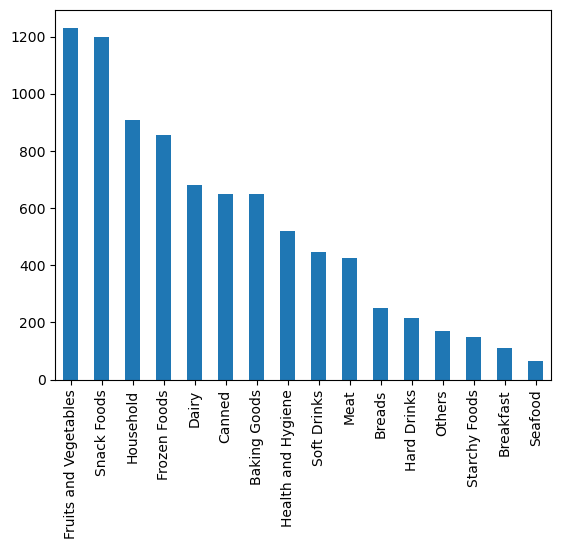

In [22]:
data['Item_Type'].value_counts().plot(kind='bar')


<Axes: >

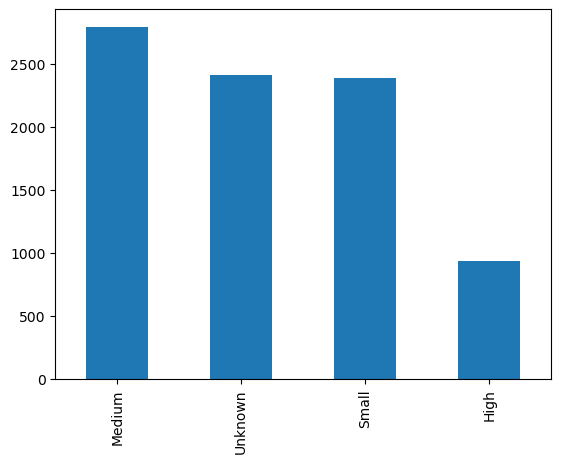

In [23]:
data['Outlet_Size'].value_counts().plot(kind='bar')


# **according to the plots we see we need to modify the data**

all the categories of the "Outlet_Identifier" and "Item_Idemtifier"column have the same number of counts,it is a good idea to drop these columns.

In [24]:
data=data.drop(['Outlet_Identifier'],axis=1,)
data = data.drop(['Item_Identifier'],axis=1)


in column Item_Fat_content some data must be modified

In [25]:
data =  data.replace(to_replace ="low fat",  value ="Low Fat") 
data =  data.replace(to_replace ="LF",  value ="Low Fat") 
data =  data.replace(to_replace ="reg",  value ="Regular") 

In [26]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Unknown,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


# **bivarte analysis**
using scatter plots

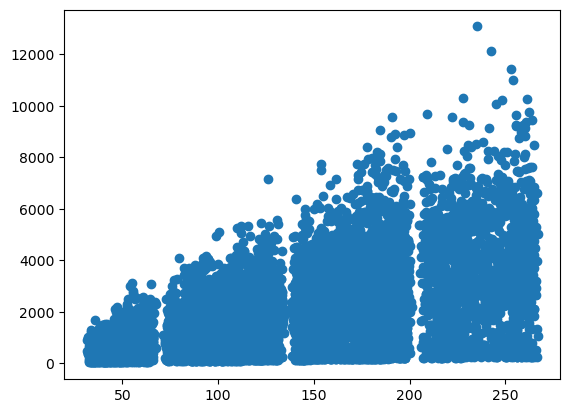

In [27]:
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.show()

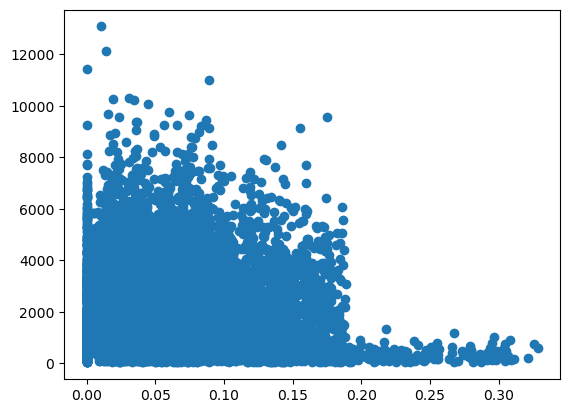

In [28]:
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'])
plt.show()

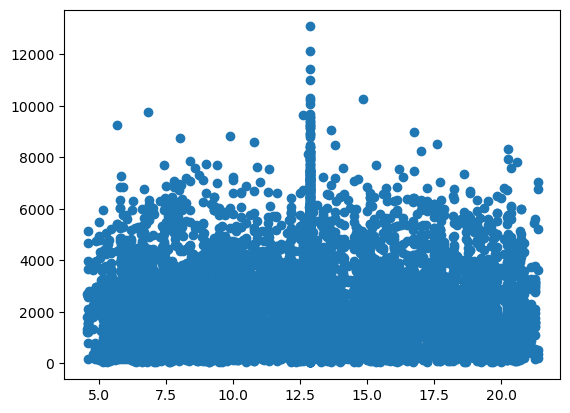

In [29]:
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'])
plt.show()    


/tmp/ipykernel_21/1166997055.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

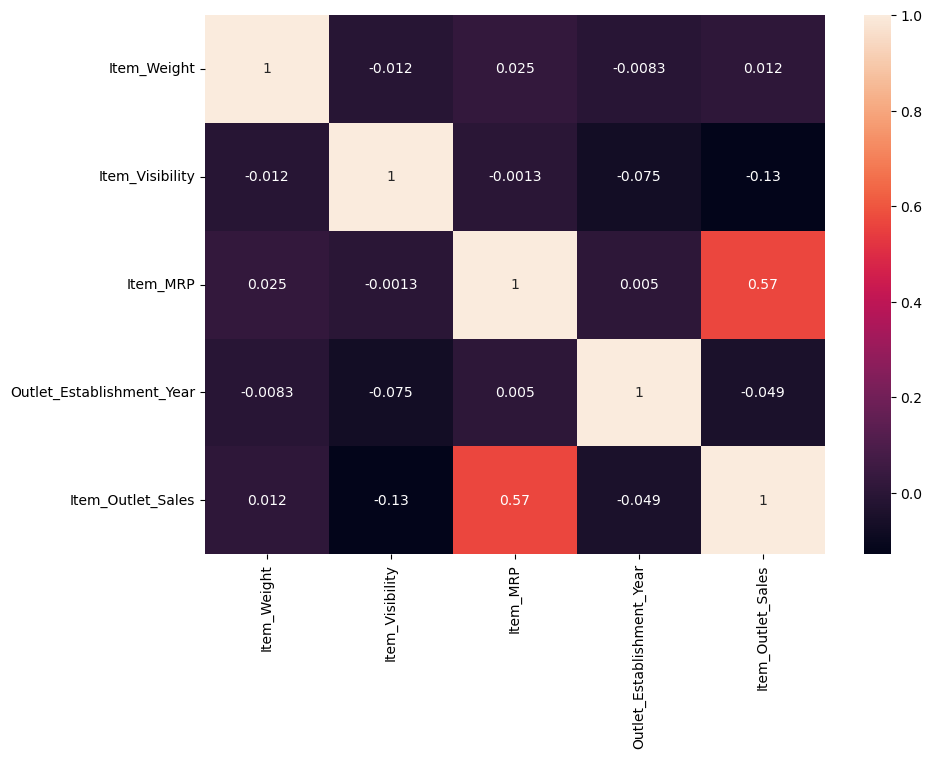

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

# **encoding categorical data**

In [31]:
label_encoder = LabelEncoder()

# select only the object columns and apply label encoding
data[data.select_dtypes(include=['object']).columns] = data.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,3,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,3,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [32]:
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# linear regression

In [33]:
x=data.drop(['Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']

In [34]:
x_train,x_validate,y_train,y_validate=train_test_split(x,y,test_size=0.2,random_state=42)


In [35]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [36]:
predictions = model.predict(x_validate)
print(mean_absolute_error(y_validate, predictions))

856.4764822547232


# random forest

In [37]:
model2=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)
model2.fit(x_train,y_train)
print(mean_absolute_error(y_validate, predictions))

856.4764822547232


# XGBRegressor

In [38]:
model3 = XGBRegressor().fit(x_train, y_train)
predictions = model3.predict(x_validate)
print(mean_absolute_error(y_validate, predictions))

777.8585699541112
